In [5]:
import pandas as pd
from tqdm.auto import tqdm

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Display the head of the dataframe
df_head = df.head()
print('Dataframe head:\n', df_head)

# Describe the dataframe
df_description = df.describe()
print('\nDataframe description:\n', df_description)

Dataframe head:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataframe description:
                  age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315     

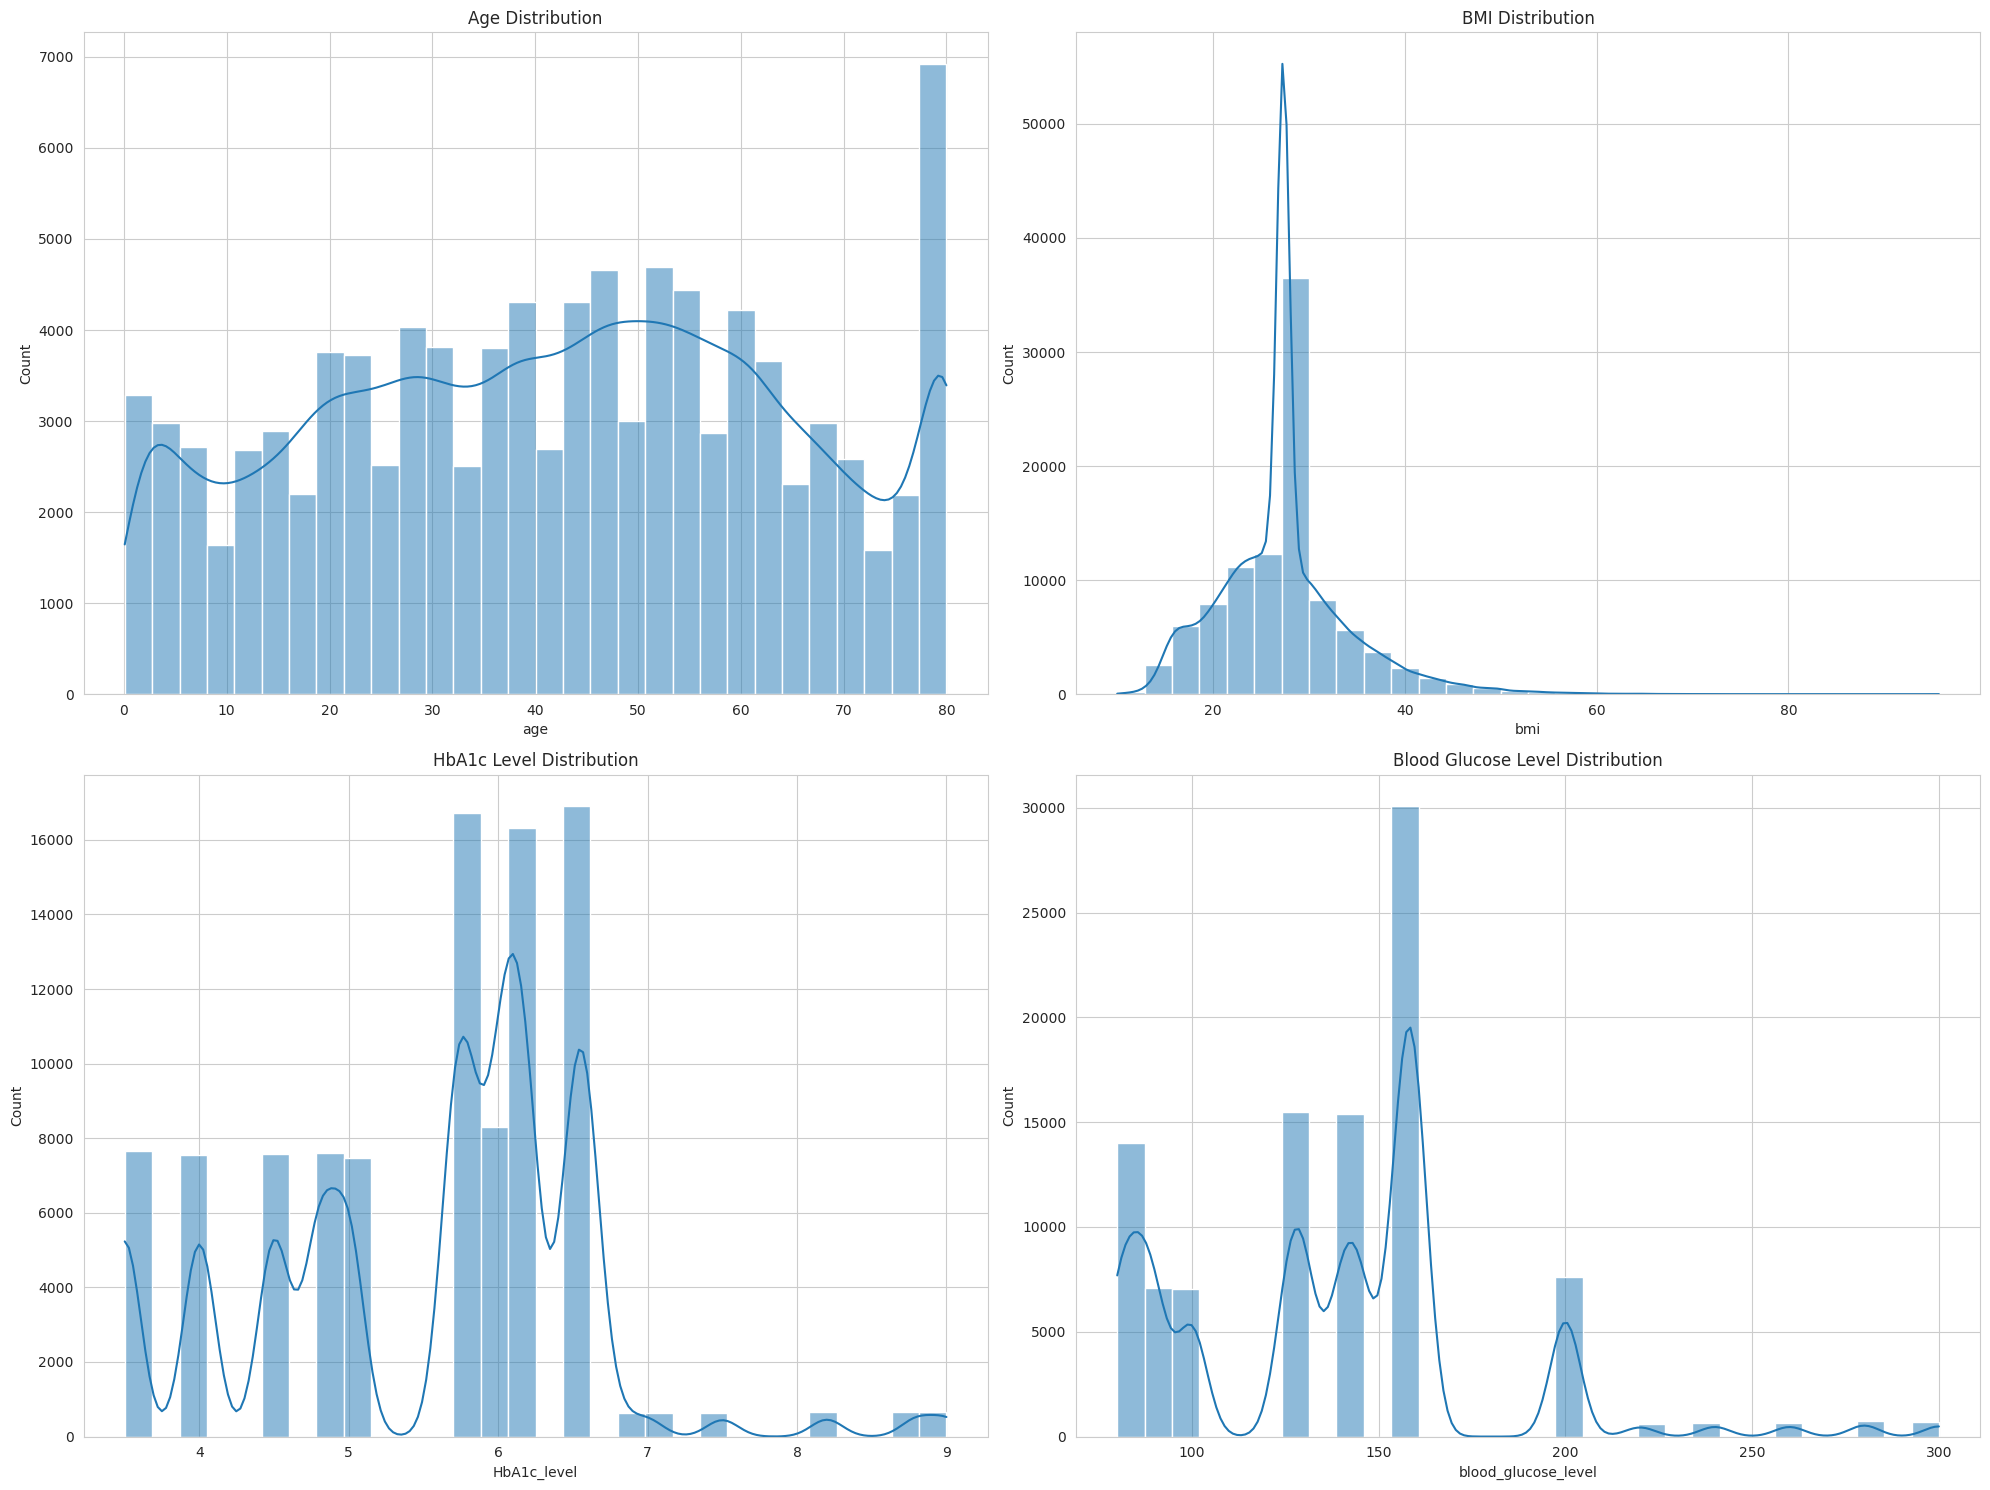

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting distributions of Age, BMI, HbA1c_level, and Blood Glucose Level
plt.figure(figsize=(20, 15))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

# BMI Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')

# HbA1c Level Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['HbA1c_level'], bins=30, kde=True)
plt.title('HbA1c Level Distribution')

# Blood Glucose Level Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title('Blood Glucose Level Distribution')

plt.tight_layout()
plt.show()

/lib/python3.11/site-packages/tqdm/std.py:888: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  t = cls(total=total, **tqdm_kwargs)
100%|██████████| 2/2 [00:00<00:00, 2000.14it/s]


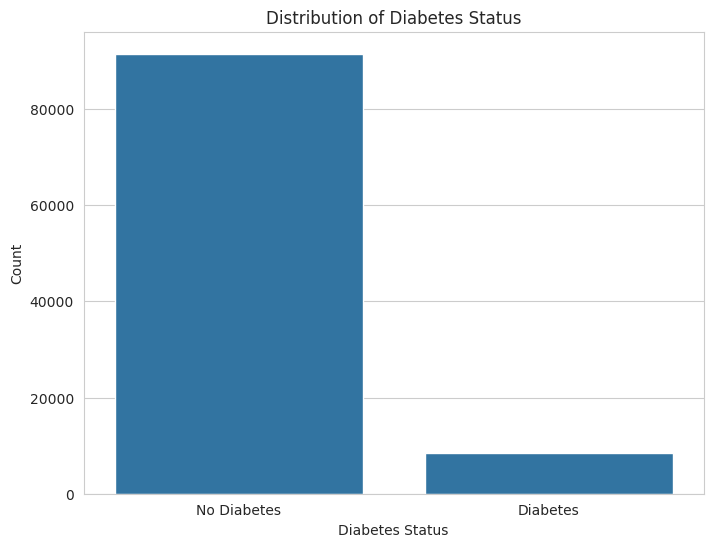

<ipython-input-9-90cfd46728eb>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop('diabetes', axis=1).corr().progress_apply(lambda x: x)
100%|██████████| 6/6 [00:00<00:00, 3000.22it/s]


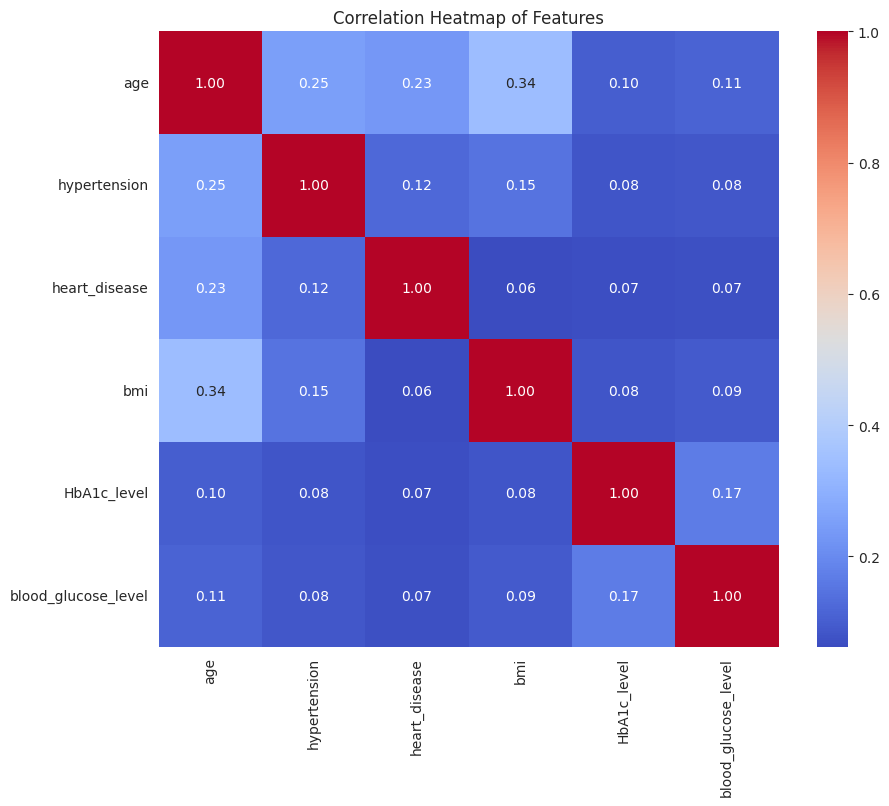

In [9]:
from tqdm.auto import tqdm
import piplite
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of diabetes status in the dataset
plt.figure(figsize=(8, 6))
diabetes_counts = df['diabetes'].value_counts().progress_apply(lambda x: x)
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.drop('diabetes', axis=1).corr().progress_apply(lambda x: x)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

100%|██████████| 6/6 [00:00<00:00, 2999.86it/s]


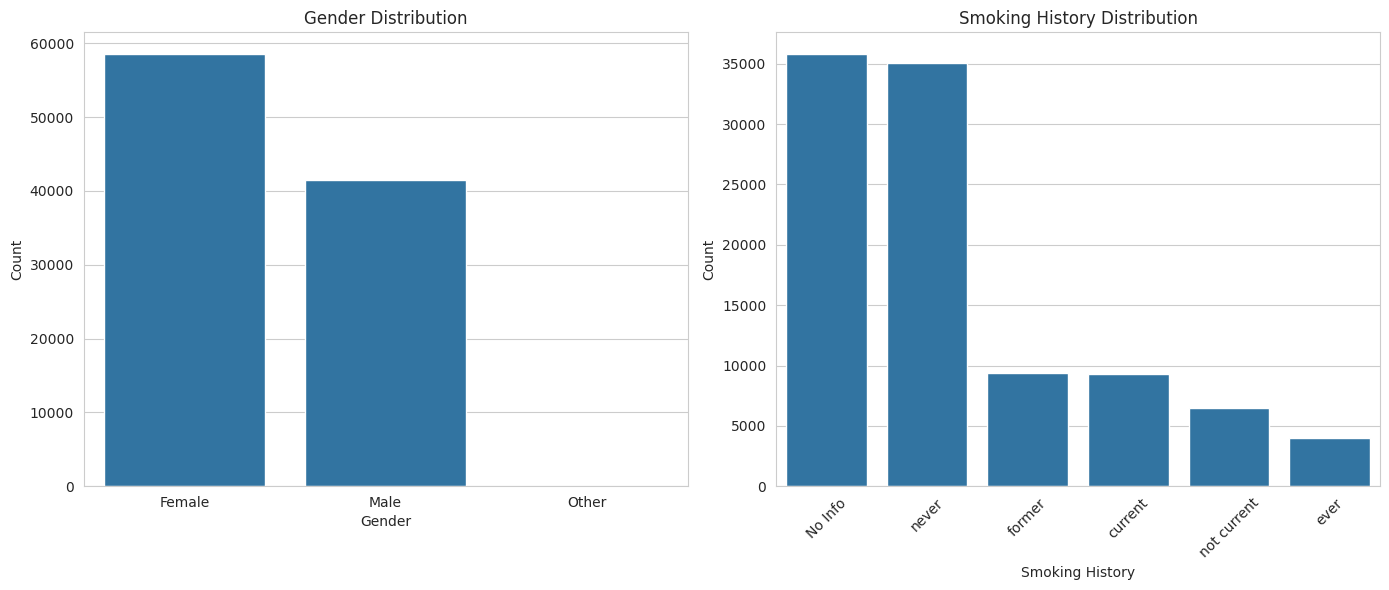

In [11]:
# Plotting the distribution of categorical variables: Gender and Smoking History
plt.figure(figsize=(14, 6))

# Gender Distribution
plt.subplot(1, 2, 1)
gender_counts = df['gender'].value_counts().progress_apply(lambda x: x)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Smoking History Distribution
plt.subplot(1, 2, 2)
smoking_counts = df['smoking_history'].value_counts().progress_apply(lambda x: x)
sns.barplot(x=smoking_counts.index, y=smoking_counts.values)
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

100%|██████████| 2/2 [00:00<00:00, 2000.14it/s]


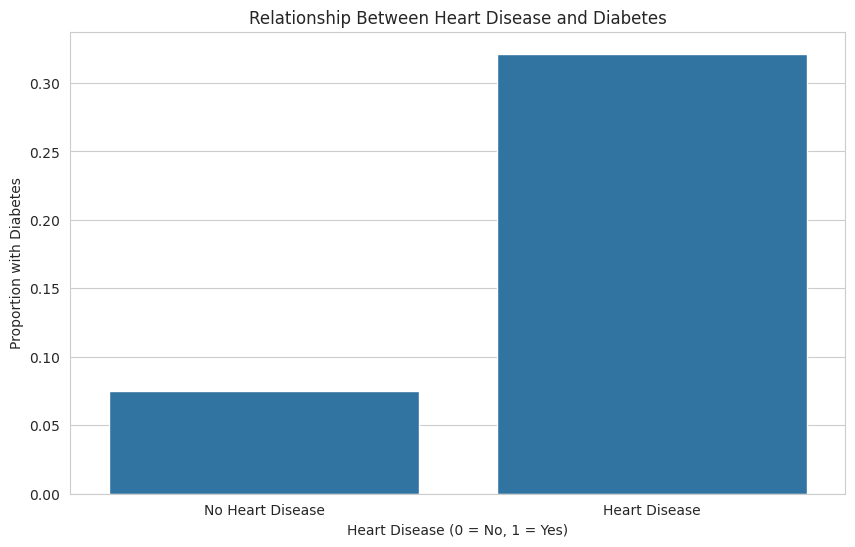

In [12]:
# Heart Disease and Diabetes
plt.figure(figsize=(10, 6))
heart_disease_diabetes = df.groupby('heart_disease')['diabetes'].mean().progress_apply(lambda x: x)
sns.barplot(x=heart_disease_diabetes.index, y=heart_disease_diabetes.values)
plt.title('Relationship Between Heart Disease and Diabetes')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()